<a href="https://colab.research.google.com/github/kcanmersin/Google-Colab-Notebooks/blob/main/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [105]:
df = pd.read_csv("/content/adult.csv")

In [106]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [109]:

for column_name in df.columns:
    if df[column_name].dtype == 'object':
        unique_values = df[column_name].unique()
        unique_values_str = ', '.join(map(str, unique_values))
        num_unique_values = df[column_name].nunique()
        print(f"Unique values in '{column_name}' ({num_unique_values}): {unique_values_str}")


Unique values in 'workclass' (9): ?, Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked
Unique values in 'education' (16): HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool
Unique values in 'marital.status' (7): Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
Unique values in 'occupation' (15): ?, Exec-managerial, Machine-op-inspct, Prof-specialty, Other-service, Adm-clerical, Craft-repair, Transport-moving, Handlers-cleaners, Sales, Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv
Unique values in 'relationship' (6): Not-in-family, Unmarried, Own-child, Other-relative, Husband, Wife
Unique values in 'race' (5): White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo
Unique values in 'sex' (2): Female, Male
Unique values in 'native.country' (42): U

<ipython-input-110-a6eadb332ec9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


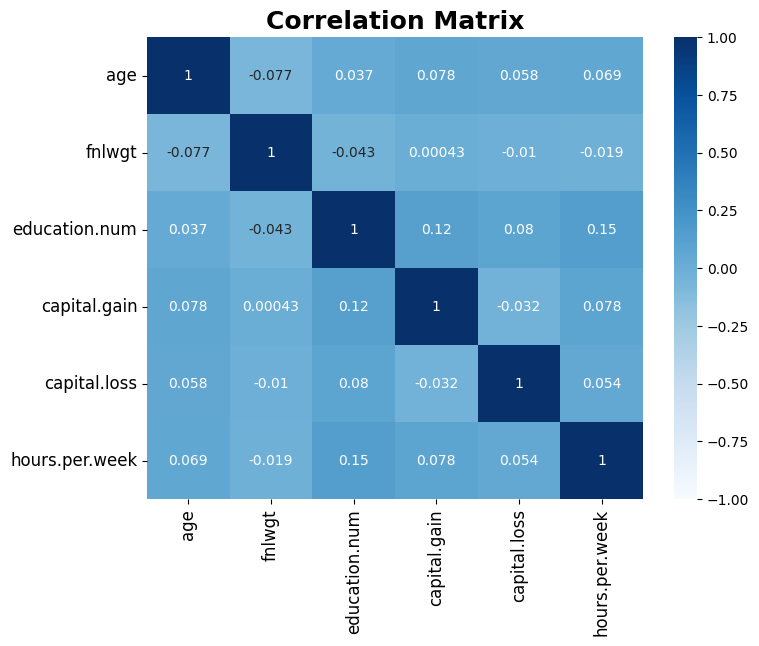

In [110]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)

plt.title('Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

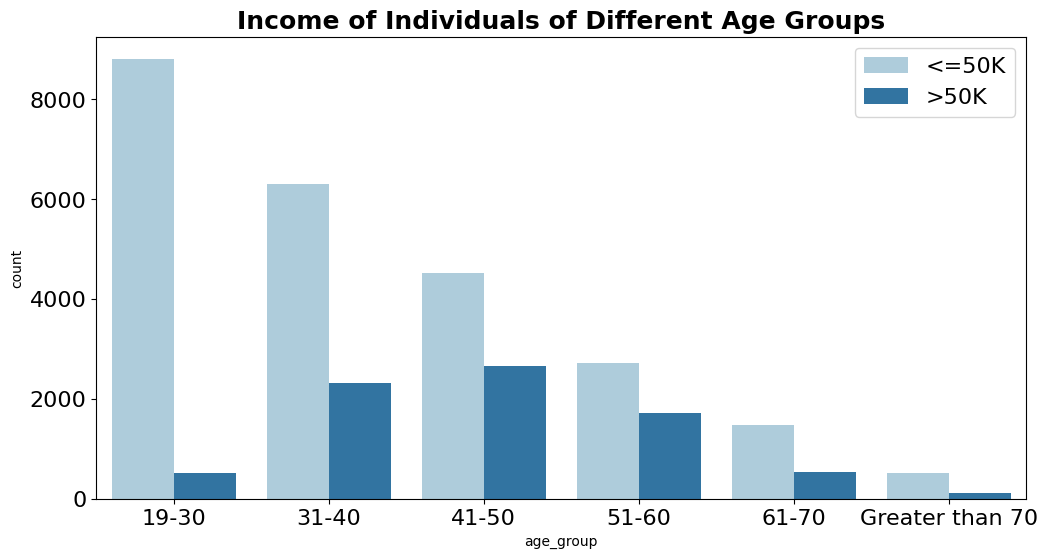

In [111]:
bins = [18, 30, 40, 50, 60, 70, float('inf')]
labels = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

custom_palette = sns.color_palette("Paired")

plt.figure(figsize=(12, 6))
sns.set_palette(custom_palette)
sns.countplot(data=df, x='age_group', hue='income', order=labels)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

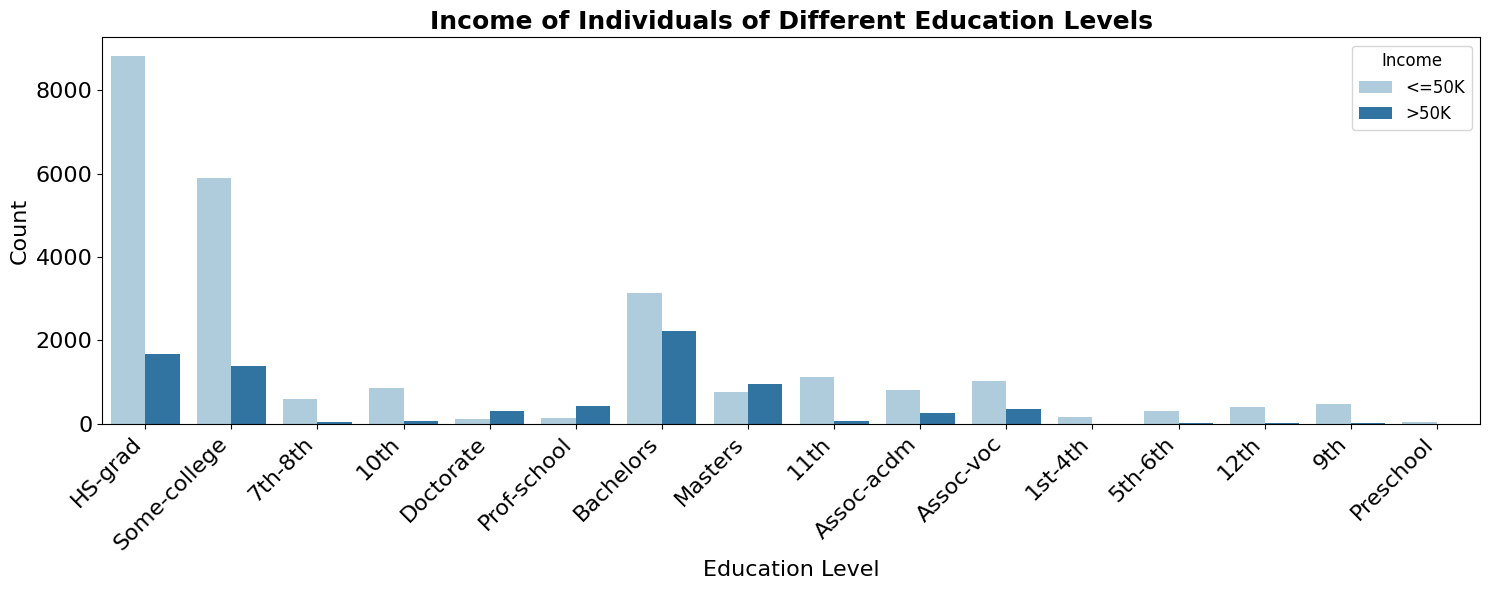

In [112]:
plt.figure(figsize=(15, 6))

order_list = df['education'].unique()

sns.countplot(data=df, x='education', hue='income', palette='Paired', order=order_list)

plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.xlabel('Education Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title="Income", fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

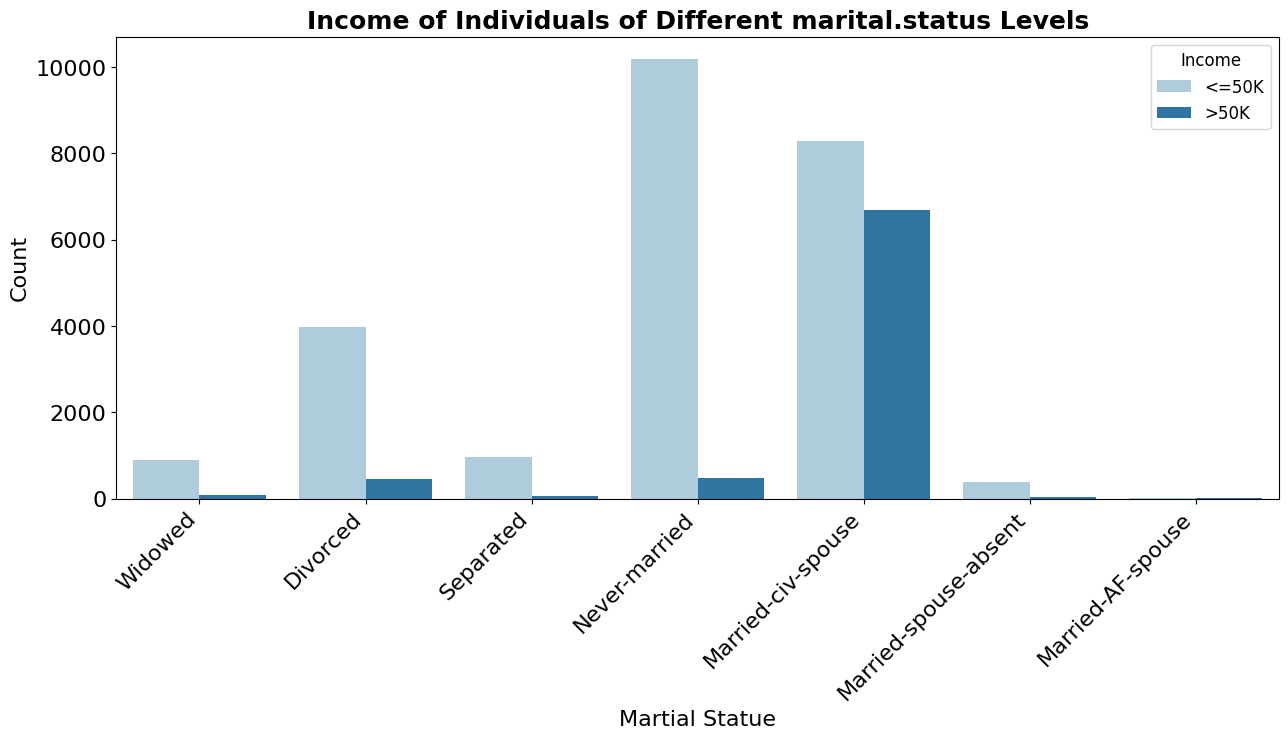

In [113]:
plt.figure(figsize=(15, 6))
order_list = df['marital.status'].unique()

sns.countplot(data=df, x='marital.status', hue='income', palette='Paired', order=order_list)
plt.title('Income of Individuals of Different marital.status Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.xlabel('Martial Statue', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title="Income", fontsize=12, title_fontsize=12)

plt.show()


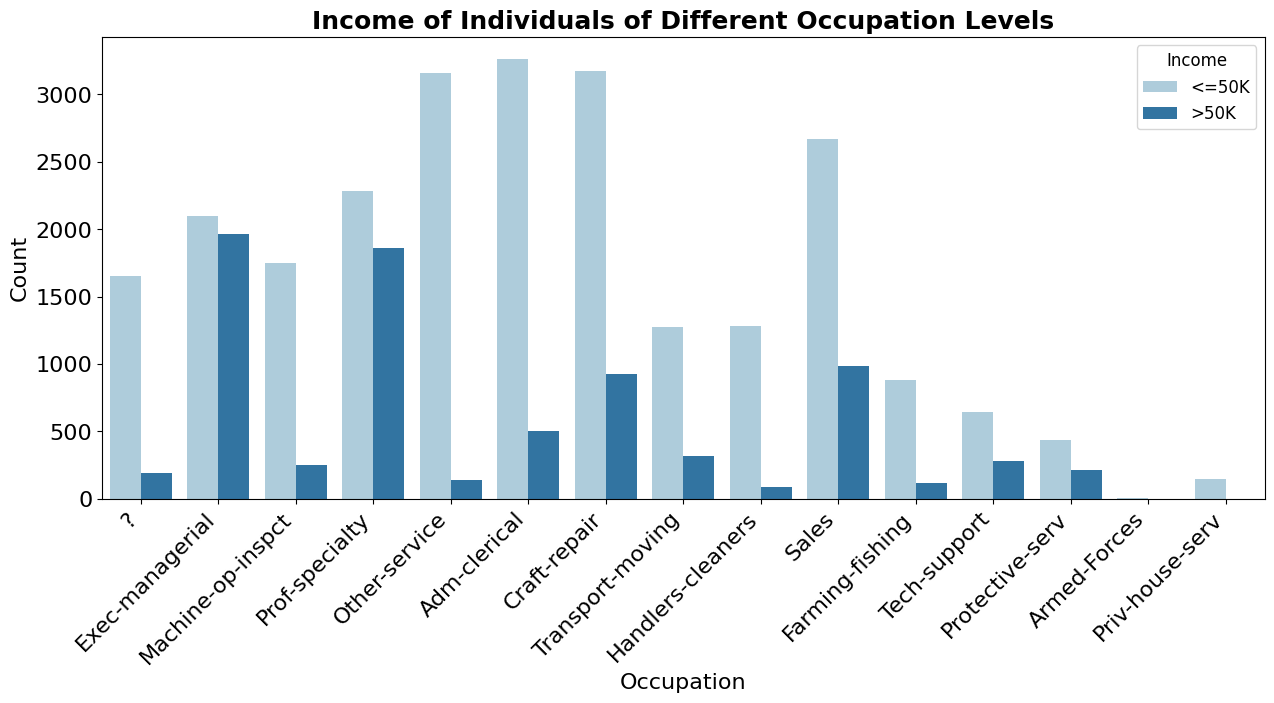

In [114]:
df_cleaned = df.dropna(subset=['occupation'])

plt.figure(figsize=(15, 6))
order_list = df_cleaned['occupation'].unique()

sns.countplot(data=df_cleaned, x='occupation', hue='income', palette='Paired', order=order_list)
plt.title('Income of Individuals of Different Occupation Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title="Income", fontsize=12, title_fontsize=12)

plt.show()

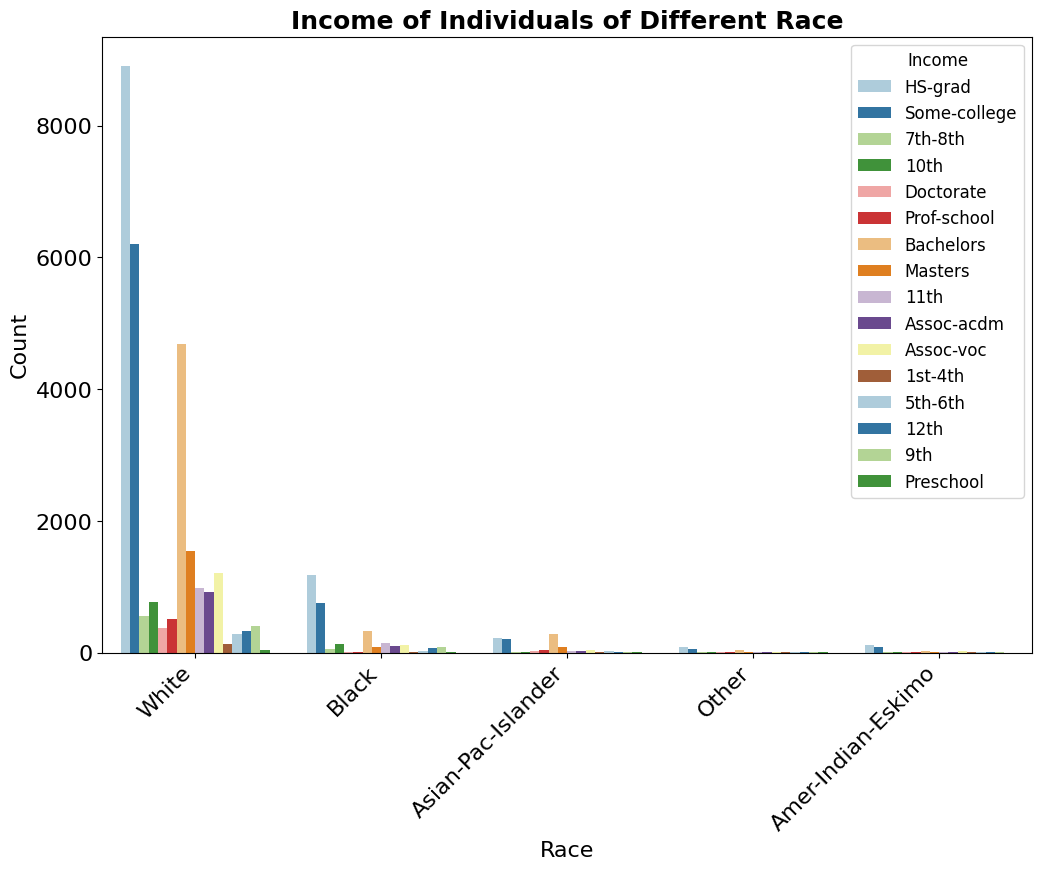

In [115]:

plt.figure(figsize=(12, 8))
order_list = df_cleaned['race'].unique()

sns.countplot(data=df_cleaned, x='race', hue='education', palette='Paired', order=order_list)
plt.title('Income of Individuals of Different Race', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.xlabel('Race', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title="Income", fontsize=12, title_fontsize=12)

plt.show()

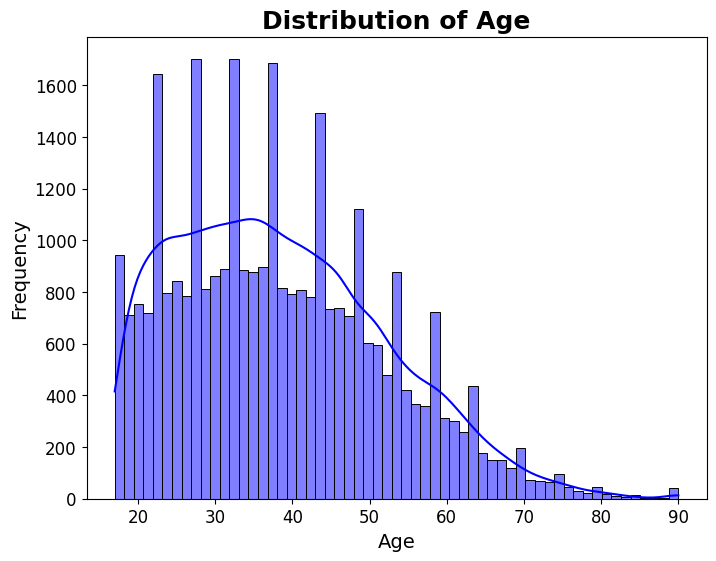

In [116]:

plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='age', kde=True, color='blue')

plt.title('Distribution of Age', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

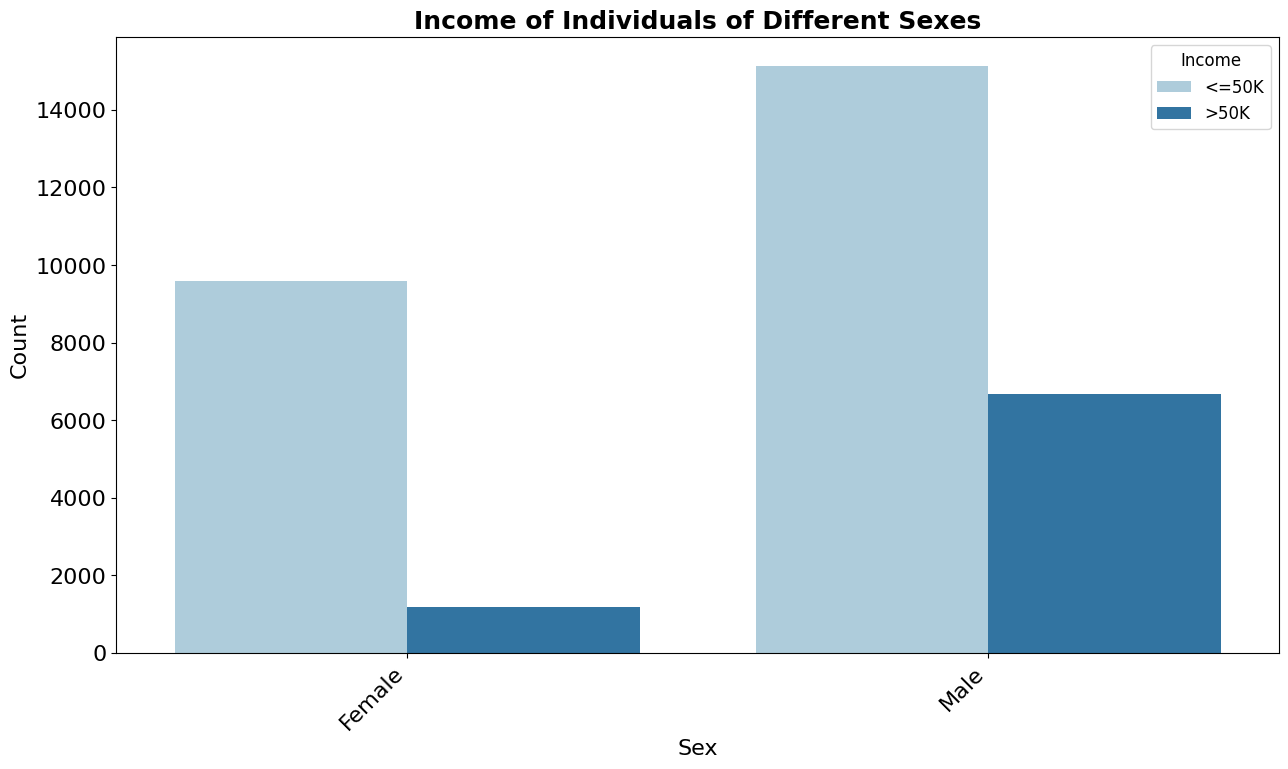

In [117]:
plt.figure(figsize=(15, 8))
order_list = df['sex'].unique()

sns.countplot(data=df, x='sex', hue='income', palette='Paired', order=order_list)
plt.title('Income of Individuals of Different Sexes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.yticks(fontsize=16)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title="Income", fontsize=12, title_fontsize=12)

plt.show()


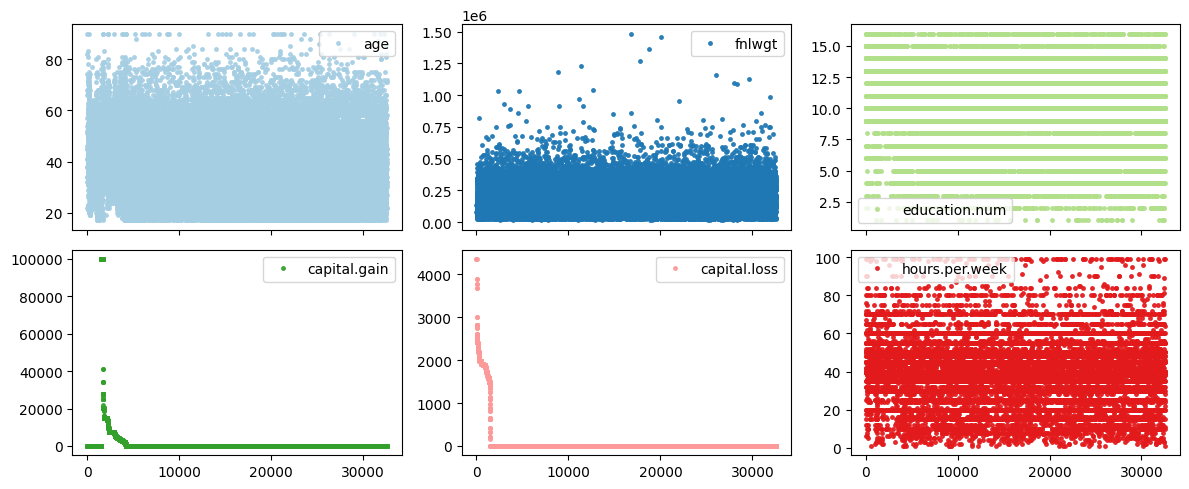

In [118]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
        figsize=(12, 5), markersize=5, color=sns.color_palette("Paired"), alpha=0.9)
plt.tight_layout()

plt.show()

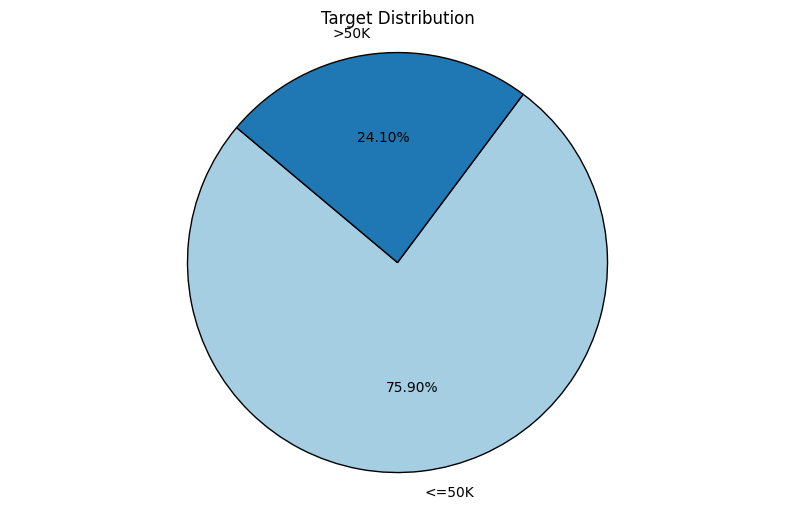

In [119]:
plt.figure(figsize=(10, 6))

target = df['income'].value_counts(normalize=True).round(decimals=3) * 100

sns.set_palette("Paired")
plt.pie(target, labels=target.index, autopct='%.2f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Target Distribution')
plt.axis('equal')

plt.show()

In [120]:
outlier_cols = {}
num_cols = df.select_dtypes(include='number').columns

for column_name in num_cols:
    IQR = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    Upper_fence = df[column_name].quantile(0.75) + (IQR * 3)
    Lower_fence = df[column_name].quantile(0.25) - (IQR * 3)

    outliers = df[(df[column_name] > Upper_fence) | (df[column_name] < Lower_fence)]
    if not outliers.empty:
        outlier_cols[column_name] = {
            'min_fence': Lower_fence,
            'upper_fence': Upper_fence
        }
        print(f"{column_name} outliers are values < {Lower_fence:.4f} or > {Upper_fence:.4f}")


fnlwgt outliers are values < -239845.0000 or > 594723.0000
capital.gain outliers are values < 0.0000 or > 0.0000
capital.loss outliers are values < 0.0000 or > 0.0000
hours.per.week outliers are values < 25.0000 or > 60.0000


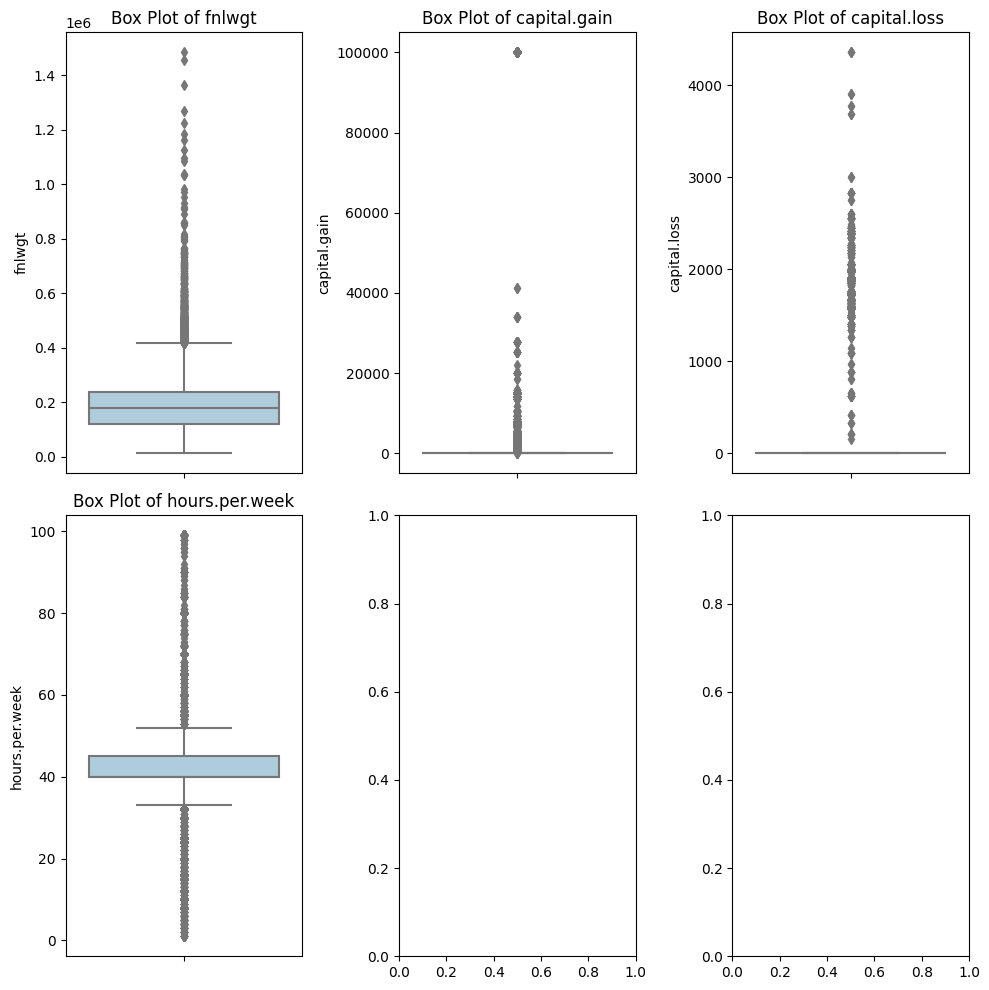

In [121]:
num_plots = len(outlier_cols)
num_columns = 3

num_rows = (num_plots + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5 * num_rows))

for i, column_name in enumerate(outlier_cols):
    row = i // num_columns
    col = i % num_columns
    sns.boxplot(data=df, y=column_name, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column_name}')

plt.tight_layout()
plt.show()

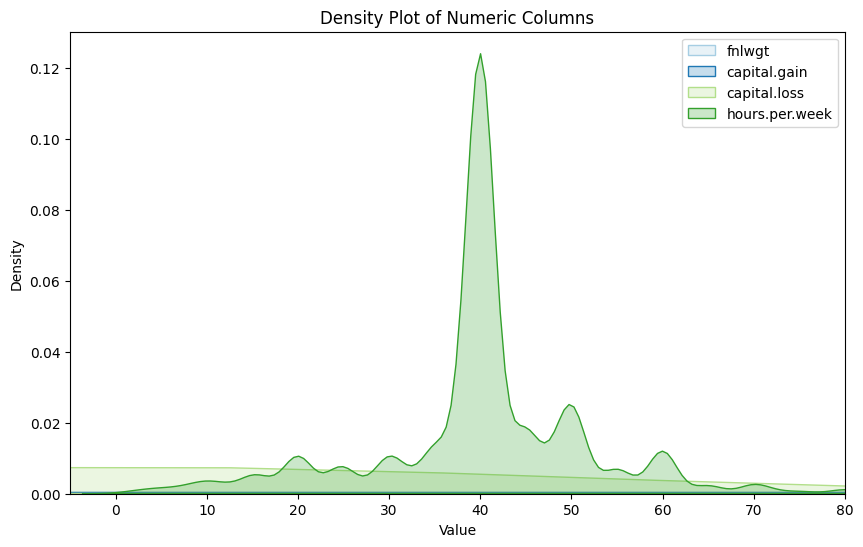

In [122]:

plt.figure(figsize=(10, 6))
for column_name in outlier_cols:
    sns.kdeplot(df[column_name], label=column_name, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Numeric Columns')
plt.legend()
plt.xlim(-5, 80)
plt.show()


In [123]:
df=df.applymap(lambda x: np.nan if x=='?' else x)

In [124]:

cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
cat_cols.remove("income")
cat_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'age_group']

In [125]:

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols.remove("age")
df.drop(["age"],inplace=True,axis=1)
num_cols

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [126]:

from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore"))




num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("cat", cat_pipeline, cat_cols),
    ("num", num_pipeline, num_cols)
])


In [132]:
df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [127]:
df.columns

Index(['workclass', 'fnlwgt', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income',
       'age_group'],
      dtype='object')

In [128]:
cat_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'age_group']

In [129]:
num_cols

['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [130]:


X = df.drop(["income"], axis=1)
y = df["income"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed=preprocessing.transform(X_test)

In [135]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y_train_binary = (y_train == '>50K').astype(int)
y_test_binary = (y_test == '>50K').astype(int)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6]
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

grid_search.fit(X_train_preprocessed, y_train_binary)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test_preprocessed)

accuracy = accuracy_score(y_test_binary, y_pred)

print("Best Parameters:", best_params)
print("Best Accuracy:", accuracy)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy: 0.8734799164721778
Confusion Matrix:
 [[5867  326]
 [ 704 1244]]


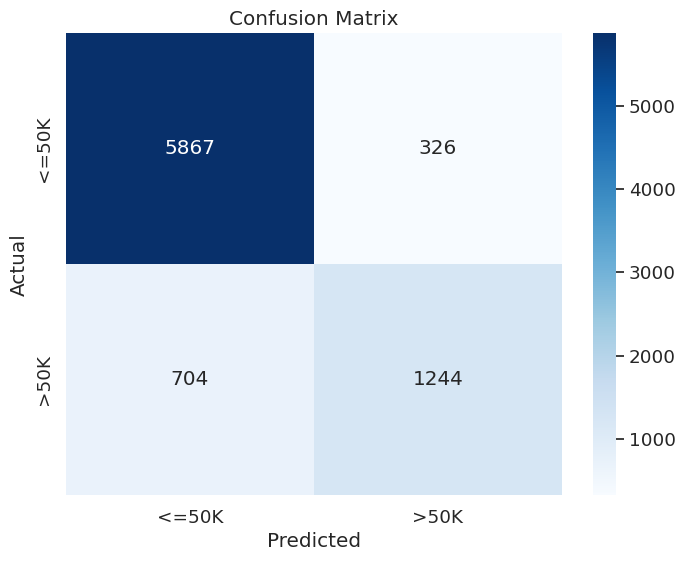

In [136]:
conf_matrix = confusion_matrix(y_test_binary, y_pred)

# Define class labels
class_labels = ['<=50K', '>50K']

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()